In [4]:
# we are looking at "A Neural-Symbolic Cognitive Agent for Online Learning and Reasoning"

# 1. Find DOI entry so we can do a bit of scraping
# The paper was published in the 11th conference:
# https://www.ijcai.org/proceedings/2011/
# with DOI entries going from 
# 10.5591/978-1-57735-516-8/IJCAI11-012 to 506 (big conference)
import semanticscholar as sch 
paper = sch.paper('10.5591/978-1-57735-516-8/IJCAI11-012', timeout=2)
# type(paper)  # dict
for key in paper :
    print(key)

abstract
arxivId
authors
citationVelocity
citations
corpusId
doi
fieldsOfStudy
influentialCitationCount
isOpenAccess
isPublisherLicensed
is_open_access
is_publisher_licensed
numCitedBy
numCiting
paperId
references
title
topics
url
venue
year


In [5]:
print(paper['abstract'])

How do we scale information extraction to the massive size and unprecedented heterogeneity of the Web corpus? Beginning in 2003, our KnowItAll project has sought to extract high-quality knowledge from the Web. 
 
In 2007, we introduced the Open Information Extraction (Open IE) paradigm which eschews hand-labeled training examples, and avoids domain-specific verbs and nouns, to develop unlexicalized, domain-independent extractors that scale to the Web corpus. Open IE systems have extracted billions of assertions as the basis for both common-sense knowledge and novel question-answering systems. 
 
This paper describes the second generation of Open IE systems, which rely on a novel model of how relations and their arguments are expressed in English sentences to double precision/recall compared with previous systems such as TEXTRUNNER and WOE.


In [3]:
# boilerplate code - Looks like SAFECOMP and IJCAI have different keys
# import sys
# sys.path.append('../src/')
# from helper_functions import getInfo, wcloud

In [93]:
def getInfo(suffix, start, end, key) :
    """
    Get AI2/DOI Semantic Scholar article info
    Inputs
        suffix: string, DOI suffix
        start: integer, first paper index
        end: integer, last paper index
        key: dictionary key
    Examples:
    # SAFECOMP 2020 get all 31 abstracts
    text = getInfo('10.1007/978-3-030-55583-2_', 1, 31, 'abstract')  
    all keys:
    'abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 
    'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed', 
    'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'
    """
    import time
    import semanticscholar as sch 
    text = ''
    for i in range (start,end+1) :
        doi = suffix + str(i)
        paper = sch.paper(doi, timeout=2)
        if key in paper :
            text = text + paper[key] + ' '
        else :
            print('No {} for paper index {}'.format(key, i))
            print("DOI entry: ", doi)
        time.sleep(2)
    return text

def getAllInfo(suffix, start, end) :
    """
    Get AI2/DOI Semantic Scholar complete article info
    Inputs
        suffix: string, DOI suffix
        start: integer, first paper index
        end: integer, last paper index
    Examples:
    Output
        papers: list of dictionaries
        
    # SAFECOMP 2020 get all 31 papers
    text = getInfo('10.1007/978-3-030-55583-2_', 1, 31, 'abstract')  
    all keys:
    'abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 
    'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed', 
    'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'
    """
    import time
    import semanticscholar as sch 
    papers = []
    for i in range (start,end+1) :
        doi = suffix + str(i)
        paper = sch.paper(doi, timeout=2)
        if 'abstract' in paper :
            print('Found paper DOI:', doi)
            papers.append(paper)
        else :
            print('No abstract for paper index {}'.format(key, i))
            print("DOI entry: ", doi)
        time.sleep(2)
    return papers

def wcloud(text, fsize=40) :
    """
    Plot word cloud
    Input
        text: string - space delimited text
        fseize: int - font size
    Ouput
        None
    Example:
    # SAFECOMP 2020
    suffix = '10.1007/978-3-030-55583-2_'
    start = 1
    end = 31
    key = 'title'
    text = getInfo('10.1007/978-3-030-55583-2_', start, end, key) 
    wcloud(text)
    Note
        This can be customised, we have here one display possibility
    """
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=fsize).generate(text)

    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    #wordcloud = WordCloud(max_font_size=40).generate(text)
    #plt.figure(figsize=(25,15))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    plt.show()

In [20]:
# IJCAI 2011 DOI suffix, we need to do it from 12 to 99 then from 100 to 506
suffix = '10.5591/978-1-57735-516-8/IJCAI11-0'
# ALL TITLES
start = 12
end = 99
IJCAI2011papers = []
papers = []
papers = getAllInfo(suffix, start, end)
IJCAI2011papers.append(papers)
suffix = '10.5591/978-1-57735-516-8/IJCAI11-'
start = 100
end = 506
papers = getAllInfo(suffix, start, end) 
IJCAI2011papers = (IJCAI2011papers + papers)
# print('IJCAI - All titles word cloud')
# wcloud(text)  

Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-012
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-013
No abstract for paper index title
DOI entry:  10.5591/978-1-57735-516-8/IJCAI11-014
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-015
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-016
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-017
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-018
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-019
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-020
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-021
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-022
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-023
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-024
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-025
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-026
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-027
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-028
Found paper DOI: 10.5591/978-1-57735

Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-160
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-161
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-162
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-163
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-164
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-165
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-166
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-167
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-168
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-169
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-170
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-171
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-172
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-173
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-174
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-175
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-176
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-177
Found pape

Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-308
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-309
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-310
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-311
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-312
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-313
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-314
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-315
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-316
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-317
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-318
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-319
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-320
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-321
No abstract for paper index title
DOI entry:  10.5591/978-1-57735-516-8/IJCAI11-322
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-323
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-324
Found paper DOI: 10.5591/978-1-57735

Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-454
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-455
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-456
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-457
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-458
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-459
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-460
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-461
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-462
No abstract for paper index title
DOI entry:  10.5591/978-1-57735-516-8/IJCAI11-463
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-464
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-465
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-466
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-467
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-468
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-469
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-470
Found paper DOI: 10.5591/978-1-57735

In [67]:
# *FIX* first entry - went in as list i.e. enclosed by [], not {} as expected for dictionary
# 
#import semanticscholar as sch 
#paper = sch.paper('10.5591/978-1-57735-516-8/IJCAI11-012', timeout=2)
# print(paper)
# IJCAI2011papers[0] = paper
# IJCAI2011papers[0] OK
IJCAI2011papers[87]

{'abstract': 'Consequence-based ontology reasoning procedures have so far been known only for Horn ontology languages. A difficulty in extending such procedures is that non-Horn axioms seem to require reasoning by case, which causes non-determinism in tableau-based procedures. In this paper we present a consequence-based procedure for ALCH that overcomes this difficulty by using rules similar to ordered resolution to deal with disjunctive axioms in a deterministic way; it retains all the favourable attributes of existing consequence-based procedures, such as goal-directed "one pass" classification, optimal worst-case complexity, and "pay-as-you-go" behaviour. Our preliminary empirical evaluation suggests that the procedure scales well to non-Horn ontologies.',
 'arxivId': None,
 'authors': [{'authorId': '3216294',
   'name': 'F. Simancik',
   'url': 'https://www.semanticscholar.org/author/3216294'},
  {'authorId': '144527361',
   'name': 'Y. Kazakov',
   'url': 'https://www.semanticsch

In [60]:
#with open('IJCAI2011papers.txt', 'w', encoding="utf-8") as f:
#    for item in IJCAI2011papers:
#        f.write("%s\n" % item)
import json
with open('IJCAI2011papers.json', 'w') as f:
    json.dump(IJCAI2011papers, f)

In [61]:
with open('IJCAI2011papers.json', 'r') as f:
    IJCAI2011papers_retrieved = json.load(f)

In [62]:
# print(len(IJCAI2011papers_retrieved)) # 397
# print(len(IJCAI2011papers)) # 397

397
397


In [64]:
# print(type(IJCAI2011papers[0])) # <class 'list'>
# print(IJCAI2011papers[0]) OK
# print(IJCAI2011papers_retrieved[0]) OK

{'abstract': 'How do we scale information extraction to the massive size and unprecedented heterogeneity of the Web corpus? Beginning in 2003, our KnowItAll project has sought to extract high-quality knowledge from the Web. \n \nIn 2007, we introduced the Open Information Extraction (Open IE) paradigm which eschews hand-labeled training examples, and avoids domain-specific verbs and nouns, to develop unlexicalized, domain-independent extractors that scale to the Web corpus. Open IE systems have extracted billions of assertions as the basis for both common-sense knowledge and novel question-answering systems. \n \nThis paper describes the second generation of Open IE systems, which rely on a novel model of how relations and their arguments are expressed in English sentences to double precision/recall compared with previous systems such as TEXTRUNNER and WOE.', 'arxivId': None, 'authors': [{'authorId': '1741101', 'name': 'Oren Etzioni', 'url': 'https://www.semanticscholar.org/author/1741

In [68]:
# IJCAI 2011 DOI suffix, we need to do it from 12 to 99 then from 100 to 506
suffix = '10.5591/978-1-57735-516-8/IJCAI11-0'
# ALL TITLES
start = 12
end = 13
# papers2 = []
papers2 = getAllInfo(suffix, start, end)

Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-012
Found paper DOI: 10.5591/978-1-57735-516-8/IJCAI11-013


In [70]:
papers2[1]

{'abstract': 'Research in AI has built upon the tools and techniques of many different disciplines, including formal logic, probability theory, decision theory, management science, linguistics and philosophy. However, the application of these disciplines in AI has necessitated the development of many enhancements and extensions. Among the most powerful of these are the methods of computational logic. \n \nI will argue that computational logic, embedded in an agent cycle, combines and improves upon both traditional logic and classical decision theory. I will also argue that many of its methods can be used, not only in AI, but also in ordinary life, to help people improve their own human intelligence without the assistance of computers.',
 'arxivId': None,
 'authors': [{'authorId': '1709749',
   'name': 'R. Kowalski',
   'url': 'https://www.semanticscholar.org/author/1709749'}],
 'citationVelocity': 0,
 'citations': [{'arxivId': None,
   'authors': [{'authorId': '2055322688', 'name': 'Am

In [71]:
# we are looking into why we got square brackets around a dictionary.
# It appeared on the first index of group 012 to 099. It is assumed to have appeared on 
# the first index of the group 100 to 506. 
# It is important that the square brackets are not inserted, as the object in the list will then
# itself be a list, and there will be no access to the dictionary keys.
# We tried to identify the first index of group 100. This is assumed to  be index 86 ~ 87th entry
# on zero-indexed list.
# if we look at the abstract for index 86
IJCAI2011papers[86]['abstract']

'We propose a new approach based on model relaxation to compute minimum-cardinality diagnoses of a (faulty) system: We obtain a relaxed model of the system by splitting nodes in the system and compile the abstraction of the relaxed model into DNNF. Abstraction is obtained by treating self-contained sub-systems called cones as single components. We then use a novel branch-and-bound search algorithm and compute the abstract minimum-cardinality diagnoses of the system, which are later refined hierarchically, in a careful manner, to get all minimum-cardinality diagnoses of the system. Experiments on ISCAS-85 benchmark circuits show that the new approach is faster than the previous state-of-the-art hierarchical approach, and scales to all circuits in the suite for the first time.'

In [76]:
# If we look at the abstract for DOI entry 10.5591/978-1-57735-516-8/IJCAI11-100
# {'abstract': 'ADOPT and BnB-ADOPT are two optimal (...)
# So we conclude that the list is not stored sequentially, so we must look at the types and determine
# if any other list exists in our list of dictionaries
for i in range (0, len(IJCAI2011papers)) :
    print("Type: {}, i: {}".format(type(IJCAI2011papers[i]), i))
# are all dictionaries.
# Why square brackets appeared around dictionary item in first entry is assumed to be because
# dictionary of lists variable "papers" had no been initialised

Type: <class 'dict'>, i: 0
Type: <class 'dict'>, i: 1
Type: <class 'dict'>, i: 2
Type: <class 'dict'>, i: 3
Type: <class 'dict'>, i: 4
Type: <class 'dict'>, i: 5
Type: <class 'dict'>, i: 6
Type: <class 'dict'>, i: 7
Type: <class 'dict'>, i: 8
Type: <class 'dict'>, i: 9
Type: <class 'dict'>, i: 10
Type: <class 'dict'>, i: 11
Type: <class 'dict'>, i: 12
Type: <class 'dict'>, i: 13
Type: <class 'dict'>, i: 14
Type: <class 'dict'>, i: 15
Type: <class 'dict'>, i: 16
Type: <class 'dict'>, i: 17
Type: <class 'dict'>, i: 18
Type: <class 'dict'>, i: 19
Type: <class 'dict'>, i: 20
Type: <class 'dict'>, i: 21
Type: <class 'dict'>, i: 22
Type: <class 'dict'>, i: 23
Type: <class 'dict'>, i: 24
Type: <class 'dict'>, i: 25
Type: <class 'dict'>, i: 26
Type: <class 'dict'>, i: 27
Type: <class 'dict'>, i: 28
Type: <class 'dict'>, i: 29
Type: <class 'dict'>, i: 30
Type: <class 'dict'>, i: 31
Type: <class 'dict'>, i: 32
Type: <class 'dict'>, i: 33
Type: <class 'dict'>, i: 34
Type: <class 'dict'>, i: 35
Ty

In [83]:
# Now we can create word clouds
# IJCAI2011papers[0].keys()
# dict_keys(['abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed', 'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'])
# IJCAI2011papers[396]['doi']
# '10.5591/978-1-57735-516-8/IJCAI11-506'

'10.5591/978-1-57735-516-8/IJCAI11-506'

In [86]:
# word cloud titles
text = ''
for i in range(0, len(IJCAI2011papers)) :
    text += IJCAI2011papers[i]['title']

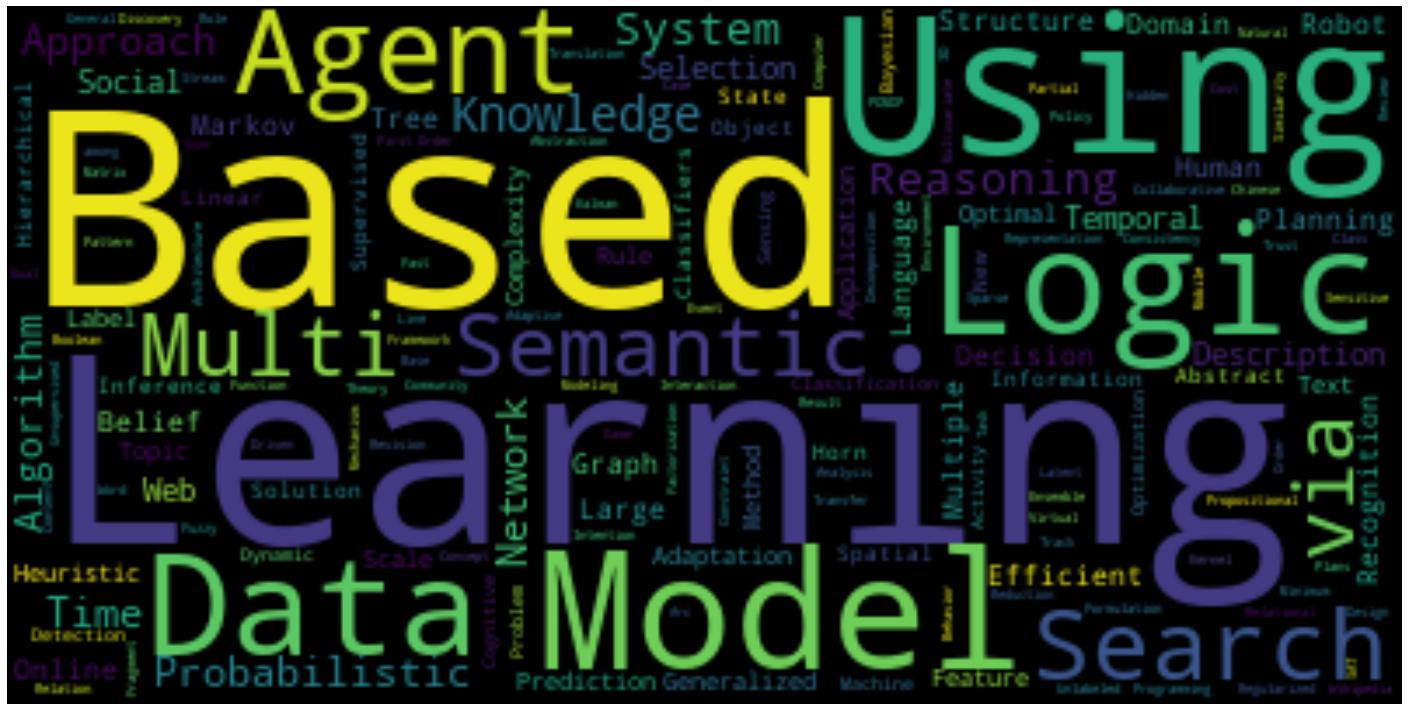

In [91]:
wcloud(text)

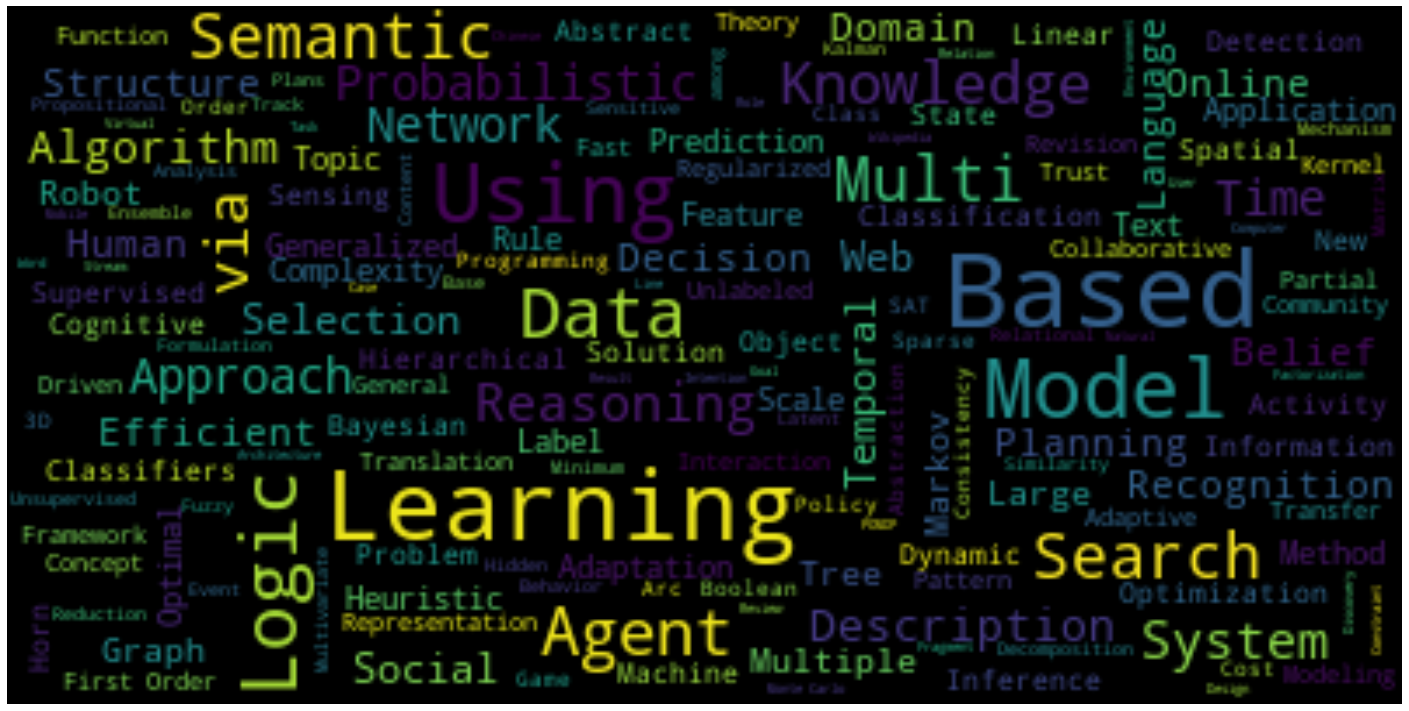

In [96]:
# save for later
# titles = text
wcloud(titles, 30)

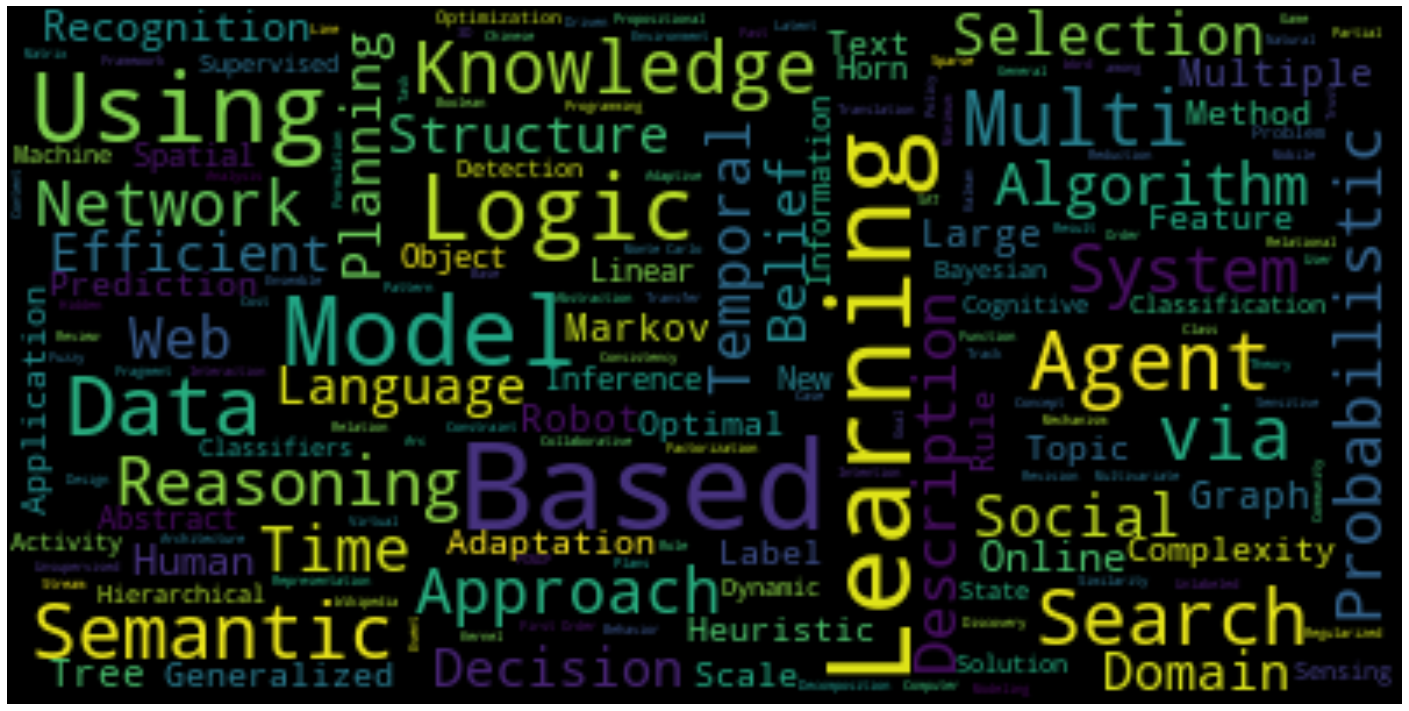

In [98]:
wcloud(titles, 35)

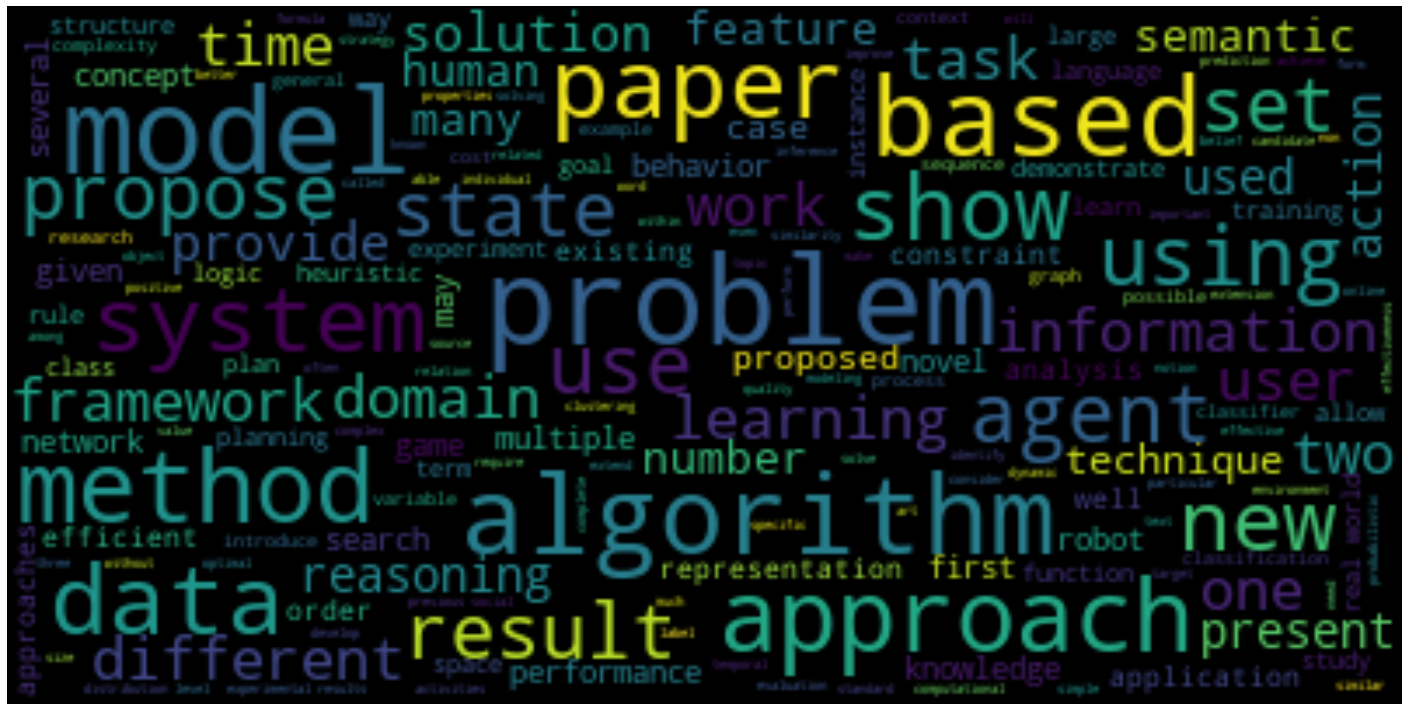

In [99]:
# abstracts
# word cloud titles
text = ''
key = 'abstract'
for i in range(0, len(IJCAI2011papers)) :
    text += IJCAI2011papers[i][key]
abstracts = text
wcloud(abstracts, 35)

In [100]:
#IJCAI2011papers[0].keys()
#'fieldsOfStudy'
#'topics'

dict_keys(['abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed', 'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'])

In [103]:
IJCAI2011papers[5]['topics']
# this is a list of dictionaries, we need to extract all topics to build the word cloud

[{'topic': 'Depressive disorder',
  'topicId': '335',
  'url': 'https://www.semanticscholar.org/topic/335'},
 {'topic': 'Real-time web',
  'topicId': '743234',
  'url': 'https://www.semanticscholar.org/topic/743234'},
 {'topic': "Dijkstra's algorithm",
  'topicId': '107933',
  'url': 'https://www.semanticscholar.org/topic/107933'},
 {'topic': 'Heuristic (computer science)',
  'topicId': '927',
  'url': 'https://www.semanticscholar.org/topic/927'},
 {'topic': 'Real-time clock',
  'topicId': '121831',
  'url': 'https://www.semanticscholar.org/topic/121831'},
 {'topic': 'Alstrom Syndrome',
  'topicId': '548332',
  'url': 'https://www.semanticscholar.org/topic/548332'},
 {'topic': 'A* search algorithm',
  'topicId': '175017',
  'url': 'https://www.semanticscholar.org/topic/175017'},
 {'topic': 'Real-time computing',
  'topicId': '172684',
  'url': 'https://www.semanticscholar.org/topic/172684'},
 {'topic': 'Experiment',
  'topicId': '378',
  'url': 'https://www.semanticscholar.org/topic/37

In [105]:
for dct in IJCAI2011papers[5]['topics'] :
    print(dct['topic'])

Depressive disorder
Real-time web
Dijkstra's algorithm
Heuristic (computer science)
Real-time clock
Alstrom Syndrome
A* search algorithm
Real-time computing
Experiment
Item Unique Identification
Real-time transcription
LAURIN-SANDROW SYNDROME
Real-time Search


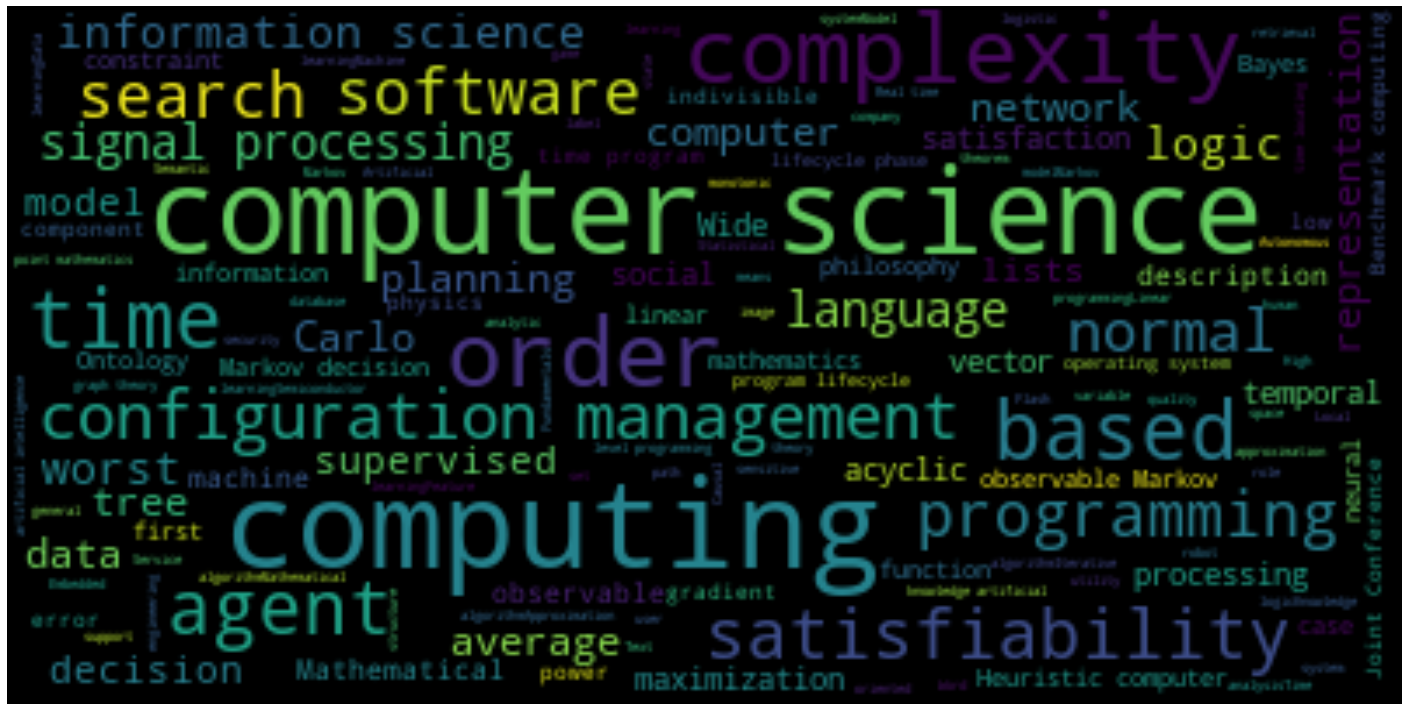

In [106]:
# abstracts
# word cloud titles
text = ''
key = 'topics'
for i in range(0, len(IJCAI2011papers)) :
    topics = IJCAI2011papers[i][key]
    for dct in topics :
        text += dct['topic']
topics_text = text
wcloud(topics_text, 35)

In [107]:
IJCAI2011papers[5]['fieldsOfStudy']

['Computer Science', 'Mathematics']

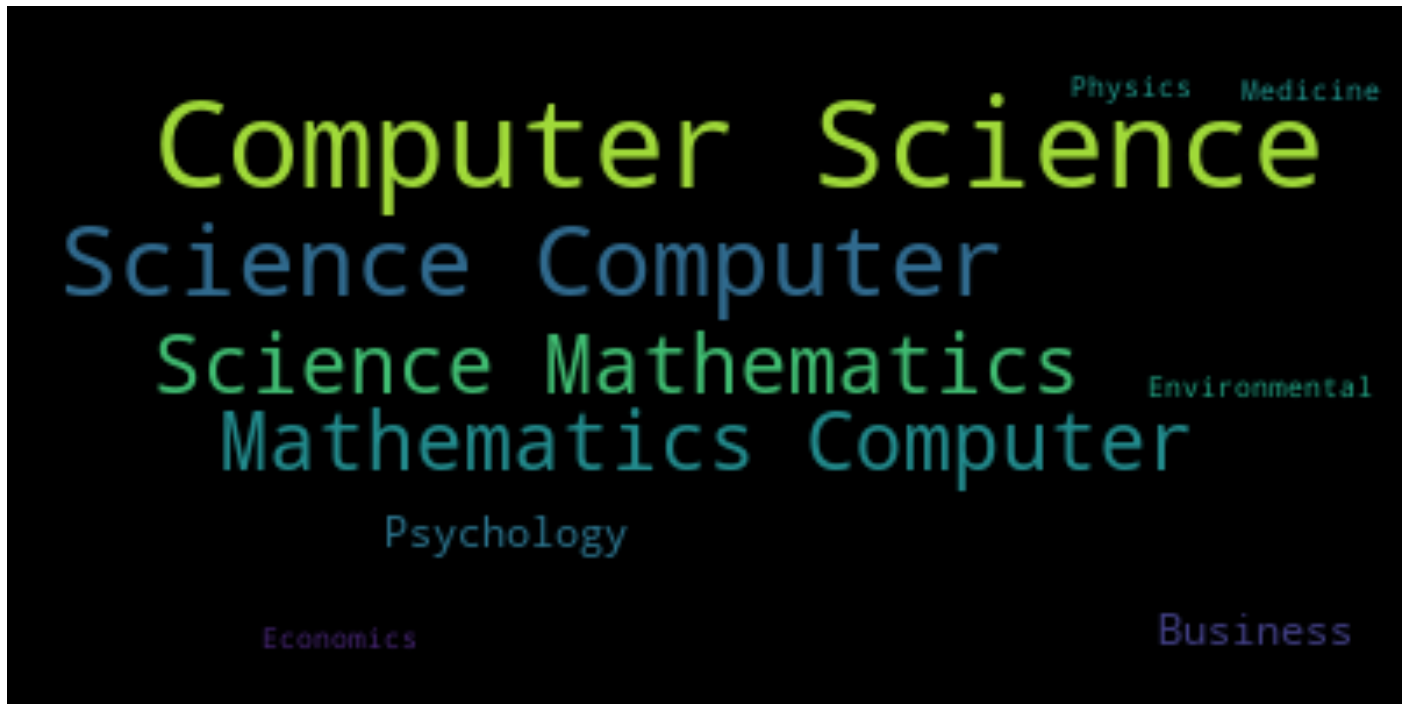

In [128]:
# fieldsOfStudy
text = ''
key = 'fieldsOfStudy'
for i in range(0, len(IJCAI2011papers)) :
    items = IJCAI2011papers[i][key]
    for item in items :
        text += item + ' '
fieldsOfStudy = text
wcloud(fieldsOfStudy, 35)

In [129]:
fieldsOfStudy

'Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Mathematics Computer Science Mathematics Computer Science Computer Science Computer Science Computer Sci

In [109]:
mylist = ['Computer Science', 'Mathematics']
for item in mylist :
    print(item)

Computer Science
Mathematics


In [112]:
topics_text

"Information extractionSecond Generation Multiplex PlusWorld Wide WebCommonsense knowledge (artificial intelligence)Question answeringDouble-precision floating-point formatGeoPlanetProgramming paradigmDCOPBranch and boundBest-first searchSearch algorithmExperimentDepth-first searchSolverBoolean satisfiability problemDecision problemMaximum satisfiability problemAnytime algorithmENCODECholesky decompositionPolynomial hierarchyCo-NPCobham's thesisBoolean algebraTime complexityPropositional calculusBoolean circuitOptimization problemConjunctive normal formIrreducibilityMathematical optimizationDecision problemTuring reductionNP-hardnessAlgorithmMaximum satisfiability problemSolverBoolean satisfiability problemPM2Resolution (logic)Depressive disorderReal-time webDijkstra's algorithmHeuristic (computer science)Real-time clockAlstrom SyndromeA* search algorithmReal-time computingExperimentItem Unique IdentificationReal-time transcriptionLAURIN-SANDROW SYNDROMEReal-time SearchSequence alignme

In [113]:
titles

'Open Information Extraction: The Second GenerationGeneralizing ADOPT and BnB-ADOPTDynamic SAT with Decision Change Costs: Formalization and SolutionsMinimization for Generalized Boolean FormulasRead-Once Resolution for Unsatisfiability-Based Max-SAT AlgorithmsReal-Time Heuristic Search with Depression AvoidanceEvaluations of Hash Distributed A* in Optimal Sequence AlignmentA Hybrid Recursive Multi-Way Number Partitioning AlgorithmConstraint Programming on Infinite Data StreamsMinimum Satisfiability and Its ApplicationsLarge Hinge Width on Sparse Random HypergraphsReal-Time Opponent Modeling in Trick-Taking Card GamesExploiting Short Supports for Generalised Arc Consistency for Arbitrary ConstraintsThe Multi-Inter-Distance ConstraintFinite-Length Markov Processes with ConstraintsA Generalized Arc-Consistency Algorithm for a Class of Counting ConstraintsNested Rollout Policy Adaptation for Monte Carlo Tree SearchReal-Time Solving of Quantified CSPs Based on Monte-Carlo Game Tree SearchT

In [118]:
mytext = IJCAI2011papers[0]['abstract']

In [123]:
# remove unwanted characters
import re
myline = re.sub('[.\\n,]', '', mytext)
myline

'How do we scale information extraction to the massive size and unprecedented heterogeneity of the Web corpus? Beginning in 2003 our KnowItAll project has sought to extract high-quality knowledge from the Web  In 2007 we introduced the Open Information Extraction (Open IE) paradigm which eschews hand-labeled training examples and avoids domain-specific verbs and nouns to develop unlexicalized domain-independent extractors that scale to the Web corpus Open IE systems have extracted billions of assertions as the basis for both common-sense knowledge and novel question-answering systems  This paper describes the second generation of Open IE systems which rely on a novel model of how relations and their arguments are expressed in English sentences to double precision/recall compared with previous systems such as TEXTRUNNER and WOE'

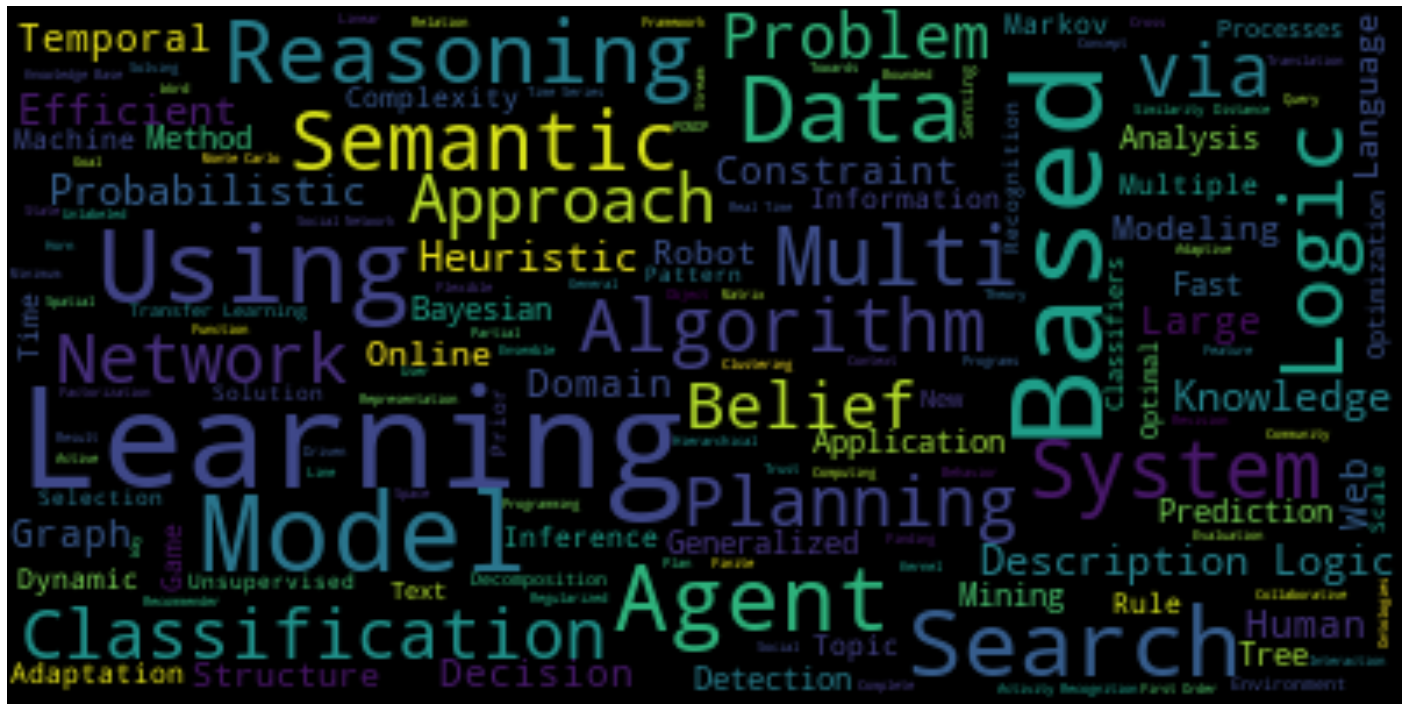

In [126]:
# Start again
# word cloud titles
import re
text = ''
key = 'title'
for i in range(0, len(IJCAI2011papers)) :
    line = IJCAI2011papers[i][key]
    # remove punctuation and newline characters
    text += re.sub('[.\\n,]', '', line) + ' '
titles = text
wcloud(titles, 40)

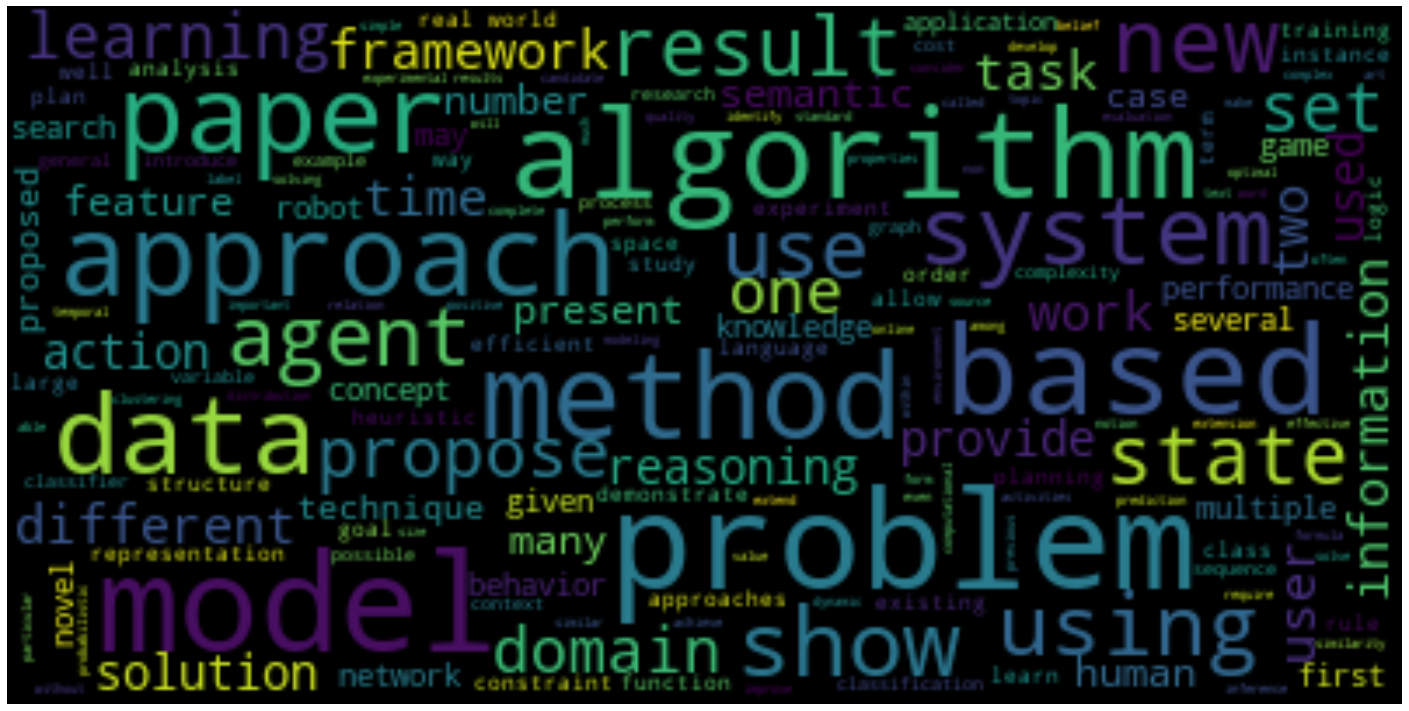

In [127]:
# Start again
# word cloud abstracts
import re
text = ''
key = 'abstract'
for i in range(0, len(IJCAI2011papers)) :
    line = IJCAI2011papers[i][key]
    # remove punctuation and newline characters
    text += re.sub('[.\\n,]', '', line) + ' '
abstracts = text
wcloud(abstracts, 40)

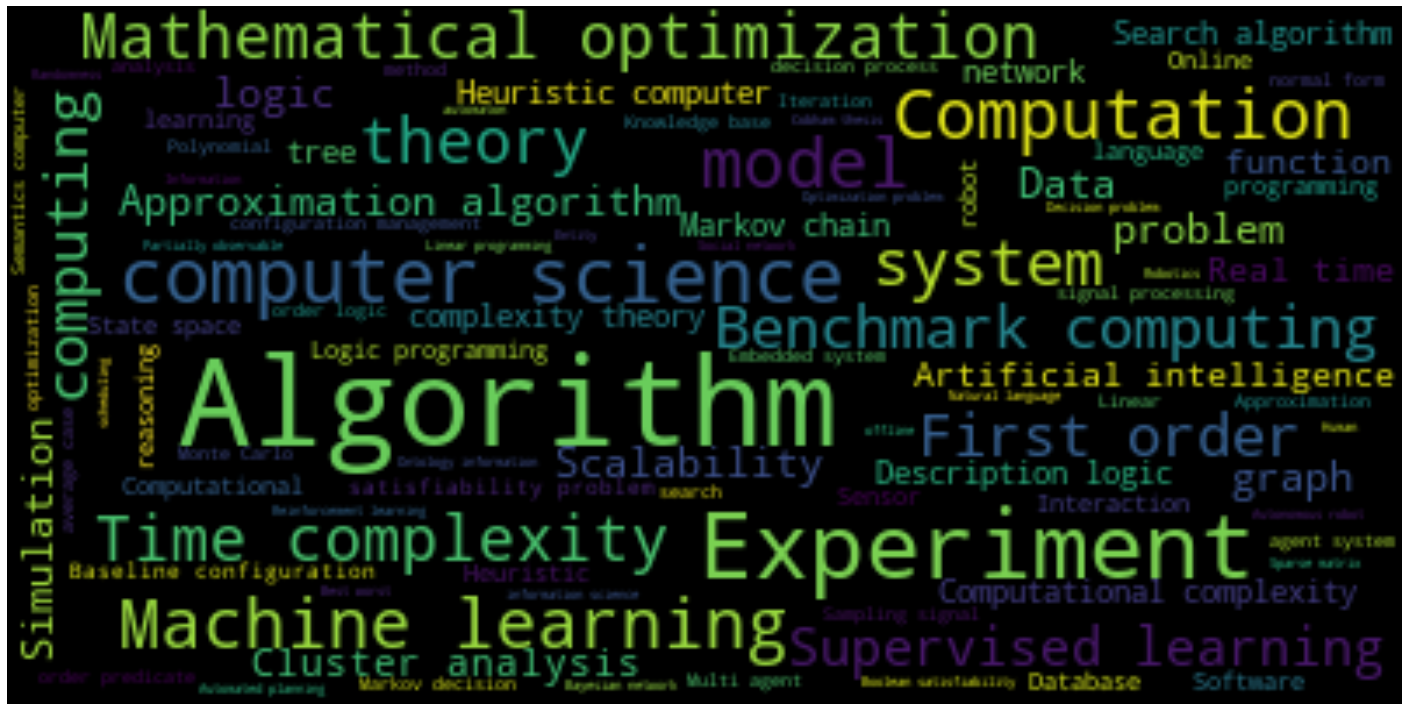

In [130]:
# abstracts
# word cloud titles
text = ''
key = 'topics'
for i in range(0, len(IJCAI2011papers)) :
    topics = IJCAI2011papers[i][key]
    for dct in topics :
        text += dct['topic'] + ' '
topics_text = text
wcloud(topics_text, 35)

In [132]:
# Searching other IJCAI conferences, seem to be avialable using Corpus ID
import numpy
object_methods = [method_name for method_name in dir(numpy)
                  if callable(getattr(object, method_name))]


AttributeError: type object 'object' has no attribute 'ALLOW_THREADS'